In [80]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter
from scipy.optimize import curve_fit
import scipy.stats as stats
import statsmodels.api as sm

In [81]:

def remove_outliers(df, column_name):
    # Calculate the mean of the column
    mean_value = df[column_name].mean()

    # Define the upper threshold (4 to 5 times the mean)
    upper_threshold =40 * mean_value

    # Filter the data and keep only rows with values within the threshold
    filtered_df = df[df[column_name] <= upper_threshold]

    return filtered_df


In [82]:
parameters = [
    {'name': 'rh', 'label': 'Relative Humidity', 'unit': '%'},
    {'name': 'pm1', 'label': 'PM\u2081', 'unit': 'µg/m\u00b3'},
    {'name': 'pm25', 'label': 'PM\u2082.\u2085', 'unit': 'µg/m\u00b3'},
    {'name': 'pm10', 'label': 'PM\u2081\u2080', 'unit': 'µg/m\u00b3'},
    {'name': 'temp', 'label': 'Temperature', 'unit': '°C'}
]

In [83]:
dfMod_april = pd.read_csv('April_data/outdoor_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfAlp_april = pd.read_csv('April_data/alpha_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfBet_april = pd.read_csv('April_data/beta_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')

dfMod_may = pd.read_csv('May_data/outdoor_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfAlp_may = pd.read_csv('May_data/alpha_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
dfBet_may = pd.read_csv('May_data/beta_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')

dfAlp = pd.concat([dfAlp_april,dfAlp_may])
dfBet = pd.concat([dfBet_april,dfBet_may])
dfMod = pd.concat([dfMod_april,dfMod_may])

dfAlp.rename(columns={'timestamp_local':'Date'},inplace=True)
dfBet.rename(columns={'timestamp_local':'Date'},inplace=True)
dfAlp.rename(columns={'sample_rh':'rh'},inplace=True)
dfBet.rename(columns={'sample_rh':'rh'},inplace=True)
dfAlp.rename(columns={'sample_temp':'temp'},inplace=True)
dfBet.rename(columns={'sample_temp':'temp'},inplace=True)
dfMod.index = dfMod.index.map(lambda x: x.replace(second=0))
dfAlp.index = dfAlp.index.map(lambda x: x.replace(second=0))
dfBet.index = dfBet.index.map(lambda x: x.replace(second=0))
common_timestamps = dfMod.index.intersection(dfAlp.index).intersection(dfBet.index)

# Filter each DataFrame to keep only the rows with common timestamps
dfMod = dfMod[dfMod.index.isin(common_timestamps)]
dfAlp = dfAlp[dfAlp.index.isin(common_timestamps)]
dfBet = dfBet[dfBet.index.isin(common_timestamps)]
print(len(dfMod), len(dfAlp), len(dfBet))


dfAlp = remove_outliers(dfAlp,'pm10')
dfBet = remove_outliers(dfBet,'pm10')
dfMod = remove_outliers(dfMod,'pm10')




dfAlp = dfAlp.iloc[::-1]
dfBet = dfBet.iloc[::-1]
dfMod = dfMod.iloc[::-1]


OG_dfAlp = dfAlp
OG_dfBet = dfBet
OG_dfMod = dfMod



print(.8*len(OG_dfAlp))
for parameter in parameters:
    OG_dfAlp[parameter["name"]] = OG_dfAlp[parameter["name"]].rolling(60).mean()
    OG_dfBet[parameter["name"]] = OG_dfBet[parameter["name"]].rolling(60).mean()
    OG_dfMod[parameter["name"]] = OG_dfMod[parameter["name"]].rolling(60).mean()
train_slice = slice(5000,int(.8*len(OG_dfAlp)))
test_slice = slice(int(.8*len(OG_dfAlp)),len(OG_dfMod))
train_dfAlp = OG_dfAlp[train_slice]
train_dfBet = OG_dfBet[train_slice]
train_dfMod = OG_dfMod[train_slice]

print(len(train_dfMod),len(train_dfAlp),len(train_dfBet))

78602 78603 78602
62760.0
57760 57760 57760


/tmp/ipykernel_25589/961677730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/961677730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {parameter["name"]}']=train_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/961677730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

PM₁ P-Value Alpha: 3.700145857249188e-51
PM₁ P-Value Beta: 1.615186726244098e-12


/tmp/ipykernel_25589/961677730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/961677730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {parameter["name"]}']=train_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/961677730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

PM₂.₅ P-Value Alpha: 2.2420067308175508e-45
PM₂.₅ P-Value Beta: 2.2724011443283284e-11


/tmp/ipykernel_25589/961677730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfMod[f'60 mean {parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/961677730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[f'60 mean {parameter["name"]}']=train_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/961677730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

PM₁₀ P-Value Alpha: 6.899387686244436e-06
PM₁₀ P-Value Beta: 5.03347430634037e-10


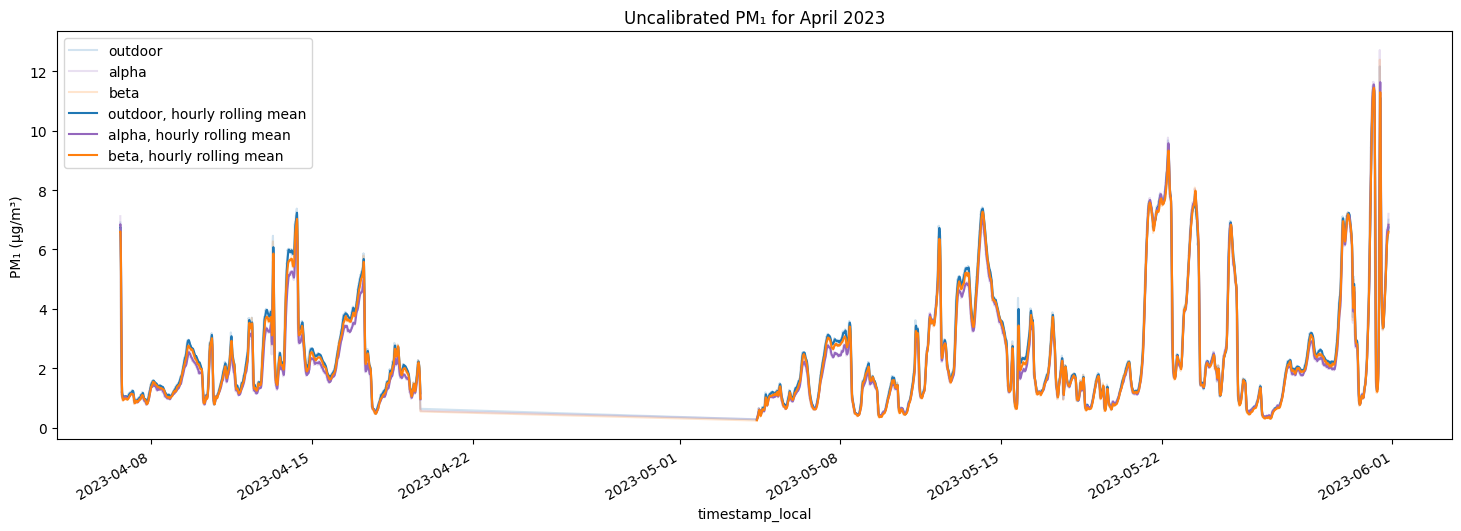

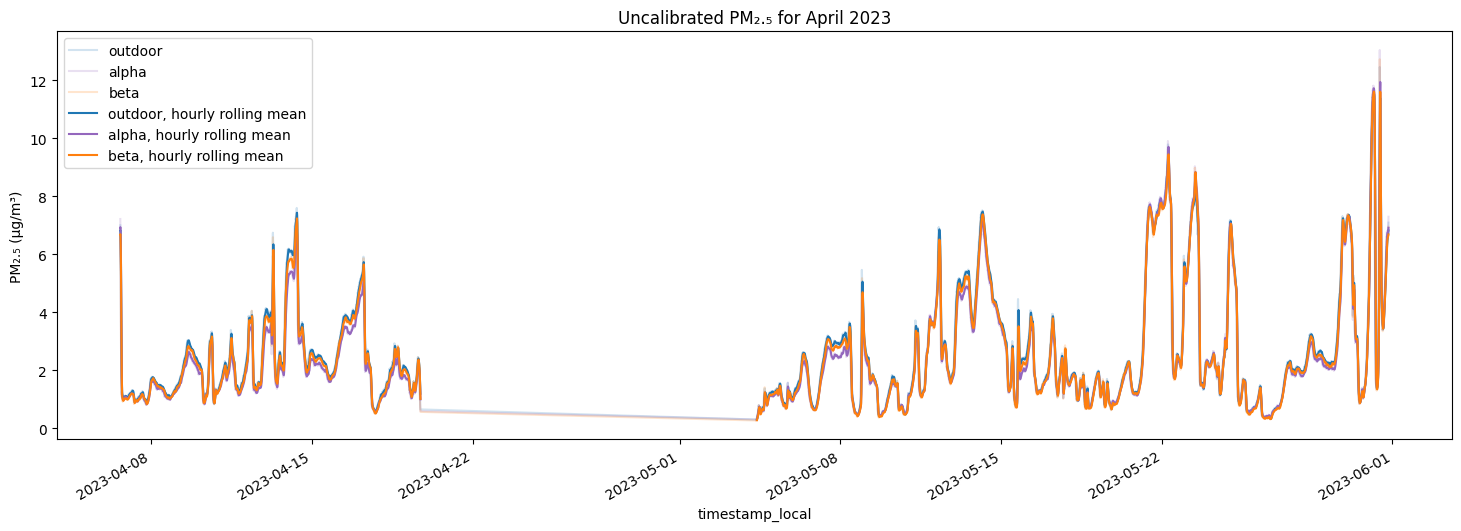

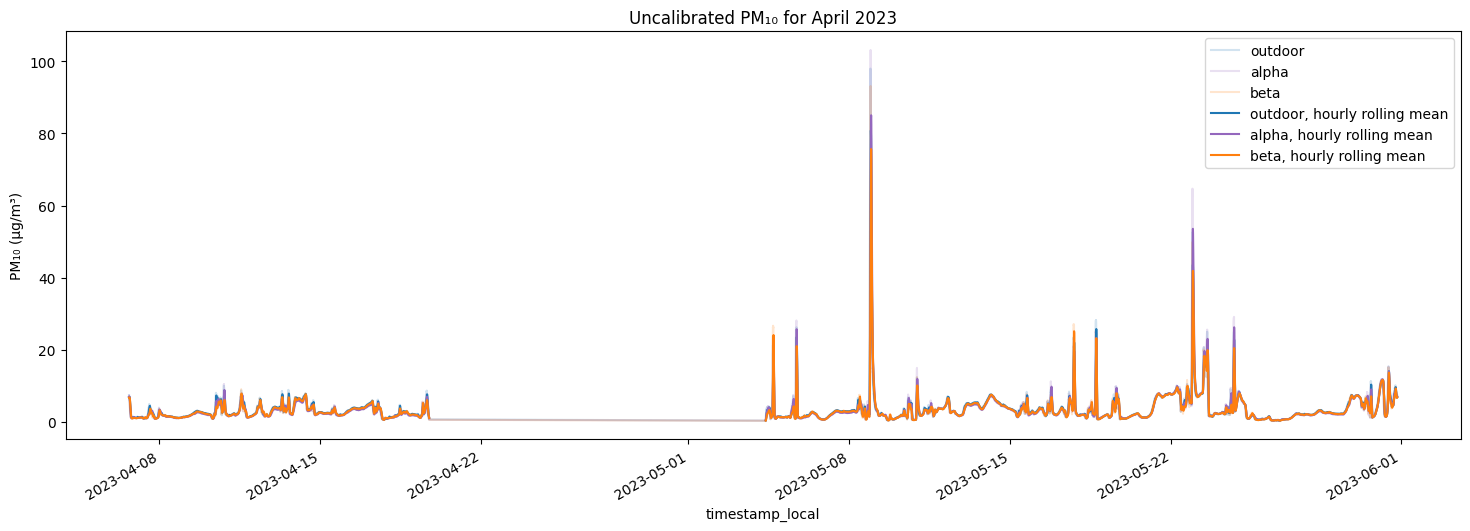

In [84]:
for parameter in parameters[1:4]:
    train_dfMod[f'60 mean {parameter["name"]}']=train_dfMod[parameter['name']].rolling(60).mean()
    train_dfAlp[f'60 mean {parameter["name"]}']=train_dfAlp[parameter['name']].rolling(60).mean()
    train_dfBet[f'60 mean {parameter["name"]}']=train_dfBet[parameter['name']].rolling(60).mean()

    fig = plt.figure()
    ax = plt.subplot(111)
    plt.gcf().set_size_inches(18, 6)
    plt.title(f'Uncalibrated {parameter["label"]} for April 2023')
    plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
    plt.xlabel('Time (days)')
    plt.grid(True)
    

   

  
    train_dfMod[parameter["name"]].plot(color='tab:blue', label='outdoor', alpha=0.2)
    train_dfAlp[parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.2)
    train_dfBet[parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.2)
    
    train_dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:blue', label='outdoor, hourly rolling mean')
    train_dfAlp[f'60 mean {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
    train_dfBet[f'60 mean {parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
    plt.legend()

    _, p_value_alpha = stats.ttest_ind(train_dfMod[parameter["name"]], train_dfAlp[parameter["name"]], equal_var=False)
    _, p_value_beta = stats.ttest_ind(train_dfMod[parameter["name"]], train_dfBet[parameter["name"]], equal_var=False)
    print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
    print(f"{parameter['label']} P-Value Beta:", p_value_beta)


In [85]:

# print(OG_dfMod)

# x = np.linspace(0, 100, 1000)
# y = np.linspace(0, 100, 1000)
# print(OG_dfAlp)
# for parameter in parameters:
#     fig = plt.figure()
#     ax = plt.subplot(111)
    
#     plt.plot(OG_dfAlp[parameter["name"]],OG_dfMod[parameter["name"]][:len(OG_dfAlp)], 'o', label='Original data')
#     plt.plot(x, y, 'r', label='Fitted line')
    
#     plt.ylim(min(OG_dfMod[parameter["name"]][:len(OG_dfAlp)]), max(OG_dfMod[parameter["name"]][:len(OG_dfAlp)]))
#     plt.xlim(min(OG_dfAlp[parameter["name"]]), max(OG_dfAlp[parameter["name"]]))
#     plt.xlabel(parameter["label"])
#     plt.ylabel(parameter["label"])

#     fig = plt.figure()
#     ax = plt.subplot(111)
    
#     plt.plot(OG_dfBet[parameter["name"]],OG_dfMod[parameter["name"]][:len(OG_dfBet)], 'o', label='Original data')
#     plt.plot(x, y, 'r', label='Fitted line')

#     plt.ylim(min(OG_dfMod[parameter["name"]][:len(OG_dfBet)]), max(OG_dfMod[parameter["name"]][:len(OG_dfBet)]))
#     plt.xlim(min(OG_dfBet[parameter["name"]]), max(OG_dfBet[parameter["name"]]))
    
    
#     plt.xlabel(parameter["label"])
#     plt.ylabel(parameter["label"])


In [86]:
def linear_func(x, a, b):
    return a * x + b 

# r squared calculation
def r_squared(y, y_fit):
    
    ss_residuals = np.sum((y - y_fit)**2)
    ss_total = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_residuals / ss_total)
    return r2
# doing the same as above but for humidity

a = 0.9736687458707229 b = 2.4629378823905324
r2 = 0.9888272097872212


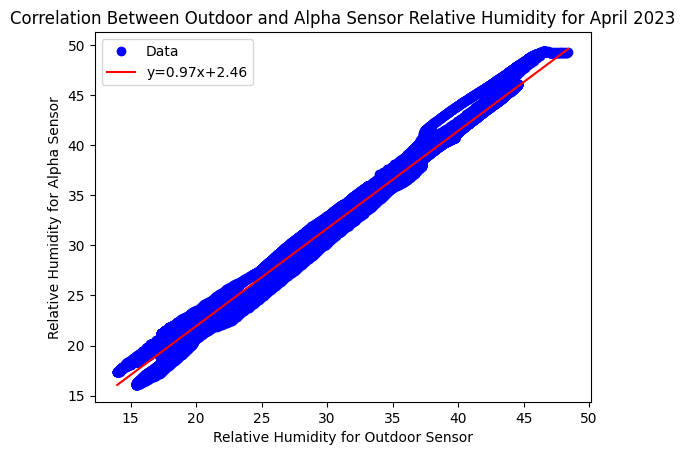

/tmp/ipykernel_25589/2480737109.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[parameter['name']] = train_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter['name']][0] - alpha_popt[parameter['name']][1] / alpha_popt[parameter['name']][0]


a = 0.9717287205016325 b = 2.719721688014742
r2 = {'rh': 0.9840750079758926}


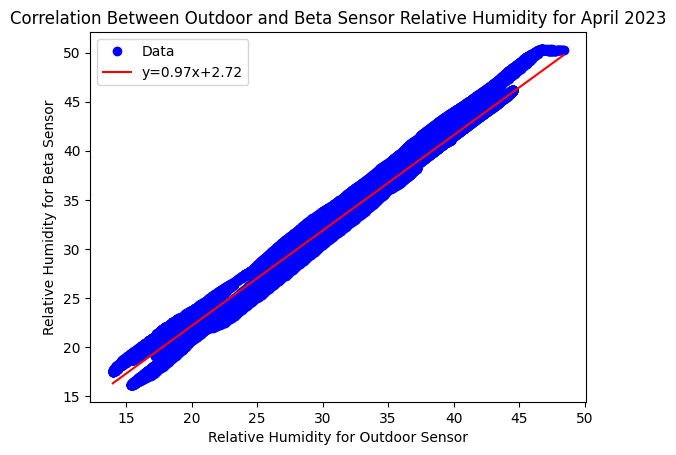

/tmp/ipykernel_25589/2480737109.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfBet[parameter["name"]] = train_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]


a = 1.004669361719986 b = -0.4499306062631525
r2 = 0.9913190176055089


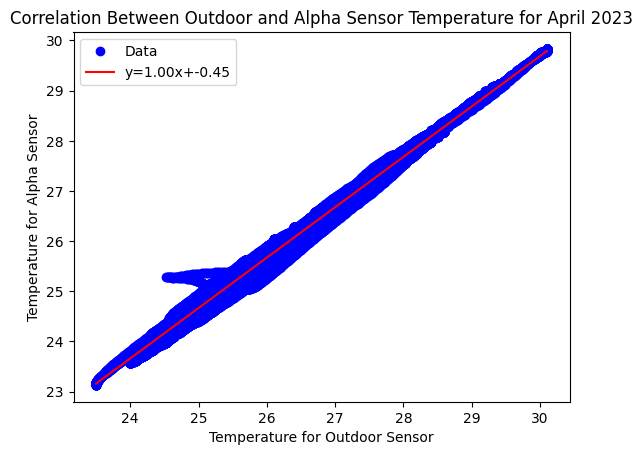

a = 1.0150608191650852 b = -0.8052995494877698
r2 = {'rh': 0.9840750079758926, 'temp': 0.9954658804269458}


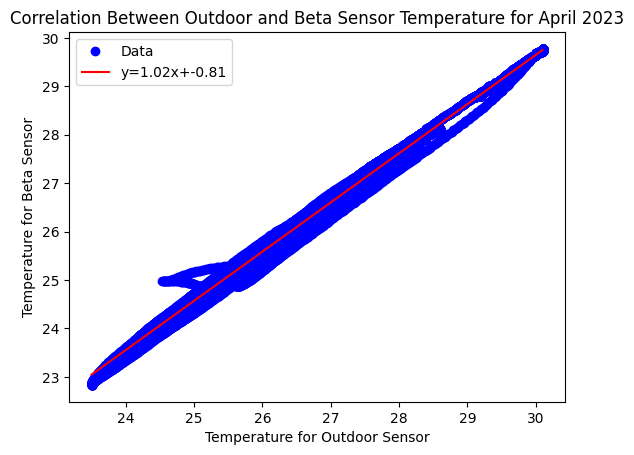

In [87]:
# Plotting the first figure
alpha_popt = {}
alpha_pcov = {}
alpha_r2 = {}
beta_popt = {}
beta_pcov = {}
beta_r2 = {}

temp_and_rh = [parameters[0],parameters[4]]
for parameter in temp_and_rh:
    fig = plt.figure()
    ax1 = plt.subplot(111)

    x_fit = np.linspace(min(train_dfMod[parameter["name"]]), max(train_dfMod[parameter["name"]]), len(train_dfMod[parameter["name"]]))
    alpha_popt[parameter['name']], alpha_pcov[parameter["name"]] = curve_fit(linear_func, train_dfMod[parameter["name"]], train_dfAlp[parameter["name"]][:len(train_dfMod[parameter["name"]])])

    alpha_fit = linear_func(x_fit, *alpha_popt[parameter['name']])
    alpha_r2[parameter['name']] = r_squared(train_dfAlp[parameter["name"]].values[:len(train_dfMod[parameter["name"]])], linear_func(train_dfMod[parameter["name"]], *alpha_popt[parameter['name']]))

    print("a =", alpha_popt[parameter['name']][0], "b =", alpha_popt[parameter["name"]][1])
    print("r2 =", alpha_r2[parameter['name']])
    plt.plot(train_dfMod[parameter["name"]], train_dfAlp[parameter["name"]][:len(train_dfMod[parameter["name"]])], 'bo', label='Data')
    plt.plot(x_fit, alpha_fit, 'r-', label=f'y={alpha_popt[parameter["name"]][0]:.2f}x+{alpha_popt[parameter["name"]][1]:.2f}')
    plt.legend()
    plt.xlabel(f'{parameter["label"]} for Outdoor Sensor')
    plt.ylabel(f'{parameter["label"]} for Alpha Sensor')
    plt.title(f'Correlation Between Outdoor and Alpha Sensor {parameter["label"]} for April 2023')
    plt.show()

    train_dfAlp[parameter['name']] = train_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter['name']][0] - alpha_popt[parameter['name']][1] / alpha_popt[parameter['name']][0]

    beta_popt[parameter['name']], beta_pcov[parameter['name']] = curve_fit(linear_func, train_dfMod[parameter['name']], train_dfBet[parameter['name']][:len(train_dfMod[parameter['name']])])

    beta_fit = linear_func(x_fit, *beta_popt[parameter['name']])
    beta_r2[parameter["name"]] = r_squared(train_dfBet[parameter['name']].values[:len(train_dfMod[parameter['name']])], linear_func(train_dfMod[parameter['name']], *beta_popt[parameter['name']]))

    print("a =", beta_popt[parameter['name']][0], "b =", beta_popt[parameter['name']][1])
    print("r2 =",beta_r2)
    plt.plot(train_dfMod[parameter['name']], train_dfBet[parameter['name']][:len(train_dfMod[parameter['name']])], 'bo', label='Data')
    plt.plot(x_fit, beta_fit, 'r-', label=f'y={beta_popt[parameter["name"]][0]:.2f}x+{beta_popt[parameter["name"]][1]:.2f}')

    plt.legend()
    plt.xlabel(f'{parameter["label"]} for Outdoor Sensor')
    plt.ylabel(f'{parameter["label"]} for Beta Sensor')
    plt.title(f'Correlation Between Outdoor and Beta Sensor {parameter["label"]} for April 2023')
    plt.show()

    train_dfBet[parameter["name"]] = train_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]

In [88]:
alpha_coefficients = {}
alpha_intercept = {}
beta_coefficients = {}
beta_intercept = {}

for parameter in parameters[1:4]:
    train_dfAlp[parameter["name"]] = train_dfAlp[parameter["name"]].astype(float)
    train_dfAlp['temp'] = train_dfAlp['temp'].astype(float)
    train_dfAlp['rh'] = train_dfAlp['rh'].astype(float)
    train_dfAlp['log_rh']=np.log(train_dfAlp['rh'])

    # Define the independent variables and add a constant term for the intercept
    X = sm.add_constant(train_dfAlp[[parameter["name"], 'temp', 'log_rh']])

    # Define the dependent variable
    y = train_dfMod[parameter["name"]]

    y = y.reset_index(drop=True)
    X = X.reset_index(drop=True)


    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Get the coefficients and intercept
    alpha_coefficients[parameter["name"]] = model.params[1:]
    alpha_intercept[parameter["name"]] = model.params[0]

    print("Coefficients:", alpha_coefficients[parameter["name"]])
    print("Intercept:", alpha_intercept[parameter["name"]])

    train_dfAlp[f"new {parameter['name']}"] = alpha_coefficients[parameter["name"]][0]*train_dfAlp[parameter["name"]] + alpha_coefficients[parameter["name"]][1]*train_dfAlp['temp'] + alpha_coefficients[parameter["name"]][2]*train_dfAlp['log_rh'] + alpha_intercept[parameter["name"]]

    train_dfBet[parameter["name"]] = train_dfBet[parameter["name"]].astype(float)
    train_dfBet['temp'] = train_dfBet['temp'].astype(float)
    train_dfBet['rh'] = train_dfBet['rh'].astype(float)
    train_dfBet['log_rh']=np.log(train_dfBet['rh'])

    # Define the independent variables and add a constant term for the intercept
    X = sm.add_constant(train_dfBet[[parameter["name"], 'temp', 'log_rh']])
    # Define the dependent variable
    y = train_dfMod[parameter["name"]]

    y = y.reset_index(drop=True)
    X = X.reset_index(drop=True)

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()
    # Get the coefficients and intercept
    beta_coefficients[parameter["name"]] = model.params[1:]
    beta_intercept[parameter["name"]] = model.params[0]

    print("Coefficients:", beta_coefficients[parameter["name"]])
    print("Intercept:", beta_intercept[parameter["name"]])

    train_dfBet[f"new {parameter['name']}"] = beta_coefficients[parameter["name"]][0]*train_dfBet[parameter["name"]] + beta_coefficients[parameter["name"]][1]*train_dfBet['temp'] + beta_coefficients[parameter["name"]][2]*train_dfBet['log_rh'] + beta_intercept[parameter["name"]]




Coefficients: pm1       1.003324
temp      0.060863
log_rh   -0.011097
dtype: float64
Intercept: -1.3880649356606507
Coefficients: pm1       1.004773
temp      0.014317
log_rh    0.007121
dtype: float64
Intercept: -0.3295412684890097
Coefficients: pm25      0.999209
temp      0.062621
log_rh   -0.002370
dtype: float64
Intercept: -1.460790984558302
Coefficients: pm25      1.001844
temp      0.014723
log_rh    0.012803
dtype: float64
Intercept: -0.35518341003939735
Coefficients: pm10      0.914612
temp      0.077327
log_rh    0.066931
dtype: float64
Intercept: -1.8192366656571308
Coefficients: pm10      1.032129
temp     -0.017725
log_rh    0.005866
dtype: float64
Intercept: 0.4851653259496336


/tmp/ipykernel_25589/216255090.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp[parameter["name"]] = train_dfAlp[parameter["name"]].astype(float)
/tmp/ipykernel_25589/216255090.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp['temp'] = train_dfAlp['temp'].astype(float)
/tmp/ipykernel_25589/216255090.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

/tmp/ipykernel_25589/3199542832.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp["60 mean new " + parameter['name']] = train_dfAlp["new " + parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/3199542832.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfBet["60 mean new " + parameter['name']] = train_dfBet["new " + parameter['name']].rolling(60).mean()


PM₁ P-Value Alpha: 0.9999999999947038
PM₁ P-Value Beta: 0.9999999999938856


/tmp/ipykernel_25589/3199542832.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp["60 mean new " + parameter['name']] = train_dfAlp["new " + parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/3199542832.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfBet["60 mean new " + parameter['name']] = train_dfBet["new " + parameter['name']].rolling(60).mean()


PM₂.₅ P-Value Alpha: 0.9999999999932955
PM₂.₅ P-Value Beta: 0.999999999992208


/tmp/ipykernel_25589/3199542832.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfAlp["60 mean new " + parameter['name']] = train_dfAlp["new " + parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/3199542832.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dfBet["60 mean new " + parameter['name']] = train_dfBet["new " + parameter['name']].rolling(60).mean()


PM₁₀ P-Value Alpha: 0.9999999999999718
PM₁₀ P-Value Beta: 0.9999999999996487


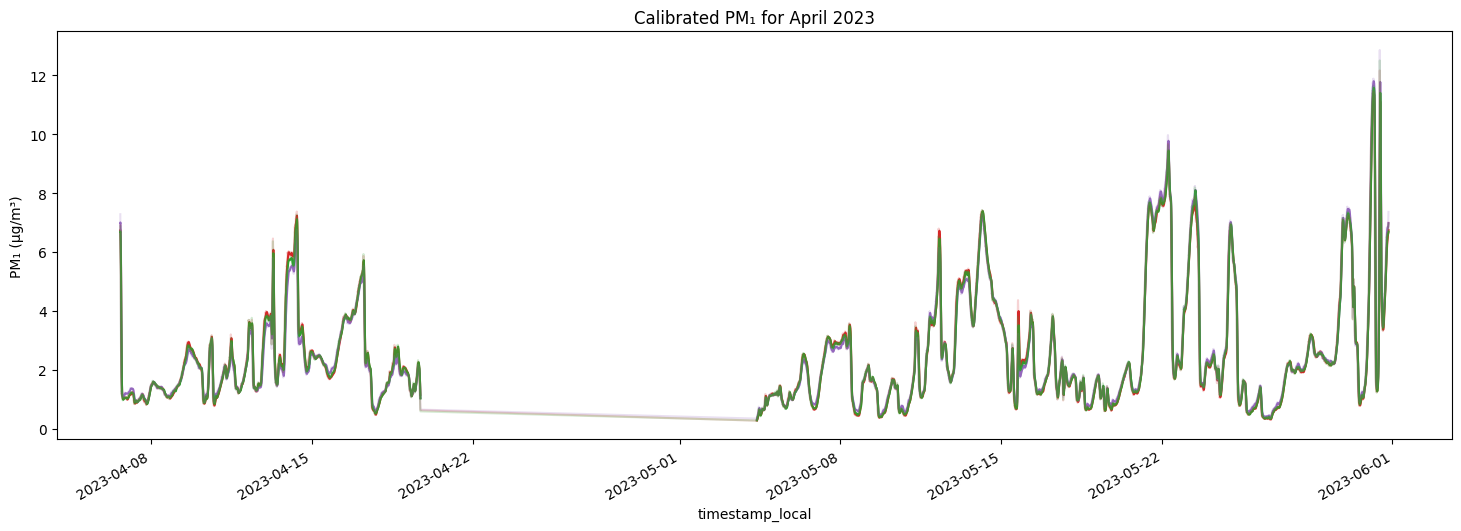

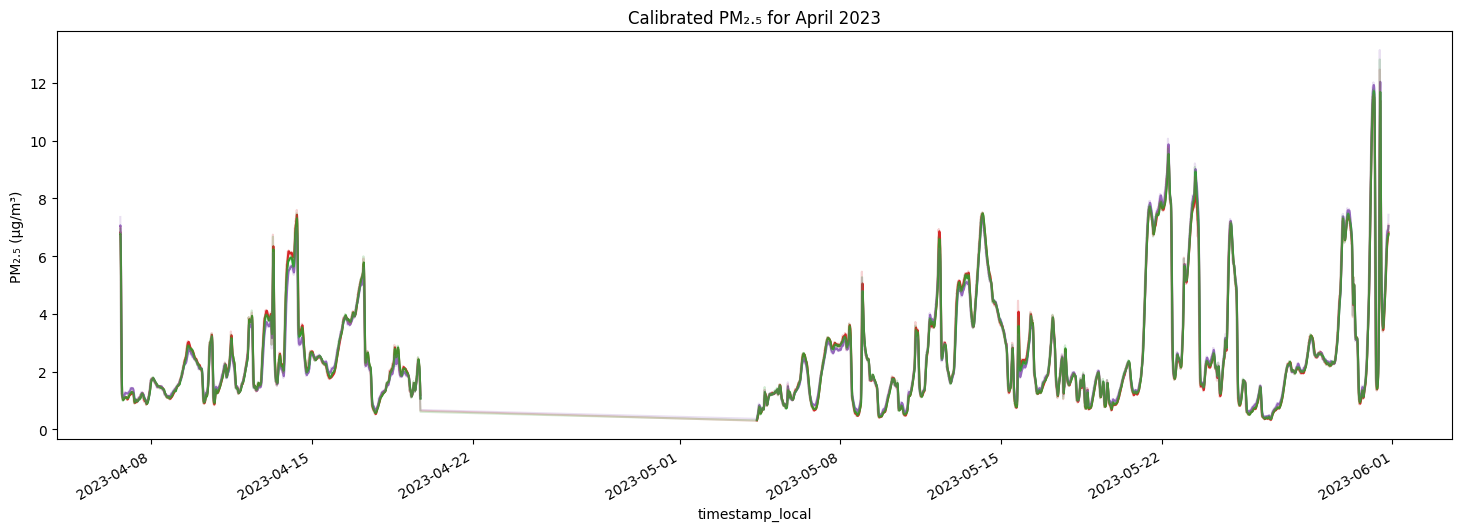

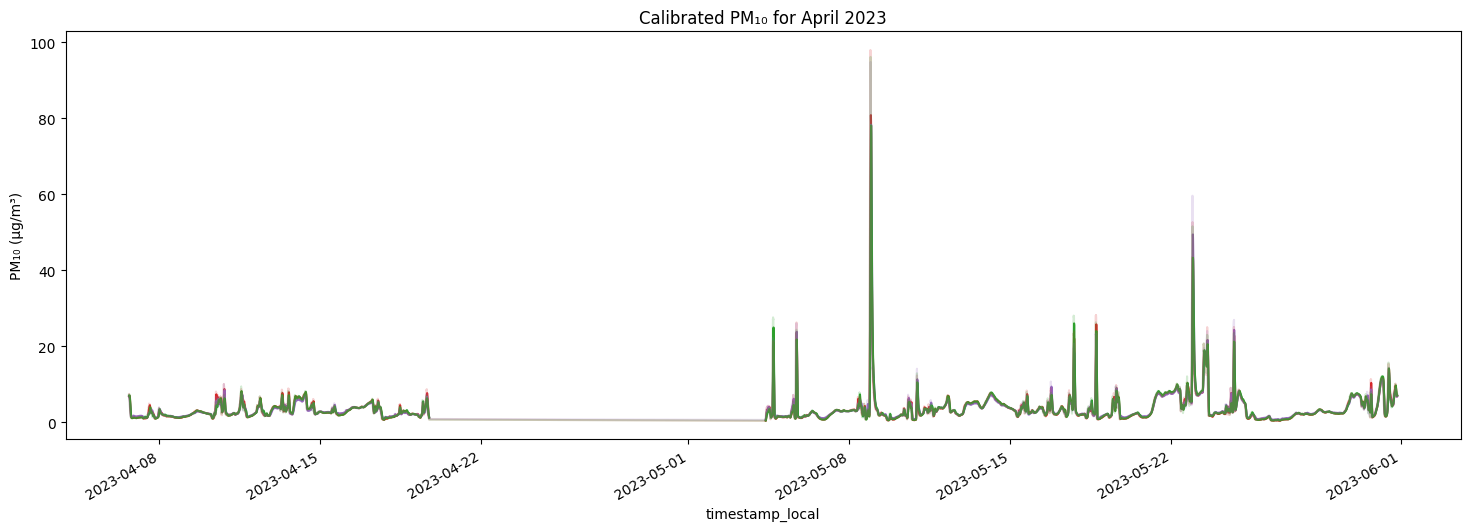

In [89]:

for parameter in parameters[1:4]:
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.gcf().set_size_inches(18, 6)
    plt.title(f'Calibrated {parameter["label"]} for April 2023')
    plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
    plt.xlabel('Time (days)')
    plt.grid(True)
    
    
    train_dfAlp["60 mean new " + parameter['name']] = train_dfAlp["new " + parameter['name']].rolling(60).mean()
    train_dfBet["60 mean new " + parameter['name']] = train_dfBet["new " + parameter['name']].rolling(60).mean()
    train_dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:red', label='outdoor hourly rolling mean')
    train_dfAlp[f'60 mean new {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
    train_dfBet[f'60 mean new {parameter["name"]}'].plot(color='tab:green', label='beta, hourly rolling mean')

    train_dfMod[f'{parameter["name"]}'].plot(color='tab:red', label='model',alpha = 0.2)
    train_dfAlp[f'new {parameter["name"]}'].plot(color='tab:purple', label='alpha', alpha = 0.2)
    train_dfBet[f'new {parameter["name"]}'].plot(color='tab:green', label='beta', alpha = 0.2)

    _, p_value_alpha = stats.ttest_ind(train_dfMod[parameter["name"]], train_dfAlp["new " +parameter["name"]], equal_var=False)
    _, p_value_beta = stats.ttest_ind(train_dfMod[parameter["name"]], train_dfBet["new " + parameter["name"]], equal_var=False)

    print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
    print(f"{parameter['label']} P-Value Beta:", p_value_beta)


In [90]:
# new_dfAlp = pd.read_csv('May_data/alpha_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
# new_dfBet = pd.read_csv('May_data/beta_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')
# new_dfMod = pd.read_csv('May_data/outdoor_may.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')




# new_dfAlp = new_dfAlp.iloc[::-1]
# new_dfBet = new_dfBet.iloc[::-1]
# new_dfMod = new_dfMod.iloc[::-1]

# new_dfMod = remove_outliers(new_dfMod, 'pm10')
# new_dfAlp = remove_outliers(new_dfAlp, 'pm10')
# new_dfBet = remove_outliers(new_dfBet, 'pm10')
# # new_dfAlp = new_dfAlp[0:10000]
# # new_dfBet = new_dfBet[0:10000]
# # new_dfMod = new_dfMod[0:10000]

# # new_dfAlp = pd.read_csv('April_data/alpha_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')[25000:40000]
# # new_dfBet = pd.read_csv('April_data/beta_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')[25000:40000]
# # new_dfMod = pd.read_csv('April_data/outdoor_april.csv',parse_dates=['timestamp_local'],index_col='timestamp_local')[25000:40000]

# new_dfAlp.index = new_dfAlp.index.map(lambda x: x.replace(second=0))
# new_dfBet.index = new_dfBet.index.map(lambda x: x.replace(second=0))
# new_dfMod.index = new_dfMod.index.map(lambda x: x.replace(second=0))

# new_dfAlp.rename(columns={'sample_rh':'rh'},inplace=True)
# new_dfBet.rename(columns={'sample_rh':'rh'},inplace=True)
# new_dfAlp.rename(columns={'sample_temp':'temp'},inplace=True)
# new_dfBet.rename(columns={'sample_temp':'temp'},inplace=True)


# new_dfAlp["log_rh"] = np.log(new_dfAlp["rh"])
# new_dfBet["log_rh"] = np.log(new_dfBet["rh"])

# common_timestamps = new_dfMod.index.intersection(new_dfAlp.index).intersection(new_dfBet.index)

# # Filter each DataFrame to keep only the rows with common timestamps
# new_dfMod = new_dfMod[new_dfMod.index.isin(common_timestamps)]
# new_dfAlp = new_dfAlp[new_dfAlp.index.isin(common_timestamps)]
# new_dfBet = new_dfBet[new_dfBet.index.isin(common_timestamps)]

# for parameter in parameters[1:4]:
#     new_dfMod[f'60 mean {parameter["name"]}']=new_dfMod[parameter['name']].rolling(60).mean()
#     new_dfAlp[f'60 mean {parameter["name"]}']=new_dfAlp[parameter['name']].rolling(60).mean()
#     new_dfBet[f'60 mean {parameter["name"]}']=new_dfBet[parameter['name']].rolling(60).mean()

#     fig = plt.figure()
#     ax = plt.subplot(111)
#     plt.gcf().set_size_inches(18, 6)
#     plt.title(f'Uncalibrated {parameter["label"]} for May 2023')
#     plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
#     plt.xlabel('Time (days)')
#     plt.grid(True)
    

   

#     new_dfMod[parameter["name"]].plot(color='tab:red', label='outdoor', alpha=0.5)
#     new_dfAlp[parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.5)
#     new_dfBet[parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.5)
#     new_dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:red', label='outdoor, hourly rolling mean')
#     new_dfAlp[f'60 mean {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
#     new_dfBet[f'60 mean {parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
#     plt.legend()

#     _, p_value_alpha = stats.ttest_ind(new_dfMod[parameter["name"]], new_dfAlp[parameter["name"]], equal_var=False)
#     _, p_value_beta = stats.ttest_ind(new_dfMod[parameter["name"]], new_dfBet[parameter["name"]], equal_var=False)

#     print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
#     print(f"{parameter['label']} P-Value Beta:", p_value_beta)





In [98]:
test_dfAlp = dfAlp[test_slice]
test_dfBet = dfBet[test_slice]
test_dfMod = dfMod[test_slice] 
for parameter in temp_and_rh:
    test_dfAlp[parameter["name"]] = test_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter["name"]][0] - alpha_popt[parameter["name"]][1] / alpha_popt[parameter["name"]][0]
    test_dfBet[parameter["name"]] = test_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]

test_dfAlp["log_rh"] = np.log(test_dfAlp["rh"])
test_dfBet["log_rh"] = np.log(test_dfBet["rh"])
test_dfMod["log_rh"] = np.log(test_dfMod["rh"])

/tmp/ipykernel_25589/518666330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[parameter["name"]] = test_dfAlp[parameter["name"]] * 1 / alpha_popt[parameter["name"]][0] - alpha_popt[parameter["name"]][1] / alpha_popt[parameter["name"]][0]
/tmp/ipykernel_25589/518666330.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfBet[parameter["name"]] = test_dfBet[parameter["name"]] * 1 / beta_popt[parameter["name"]][0] - beta_popt[parameter["name"]][1] / beta_popt[parameter["name"]][0]
/tmp/ip

/tmp/ipykernel_25589/2936601389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/2936601389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean new {parameter["name"]}']=test_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/2936601389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

PM₁ P-Value Alpha: 6.014239246506202e-90
PM₁ P-Value Beta: 8.830081002335626e-11


/tmp/ipykernel_25589/2936601389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/2936601389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean new {parameter["name"]}']=test_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/2936601389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

PM₂.₅ P-Value Alpha: 4.7235176284450553e-73
PM₂.₅ P-Value Beta: 1.6137296329130902e-09


/tmp/ipykernel_25589/2936601389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/2936601389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean new {parameter["name"]}']=test_dfAlp[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/2936601389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

PM₁₀ P-Value Alpha: 3.3388739662609176e-05
PM₁₀ P-Value Beta: 0.0008280419572695361


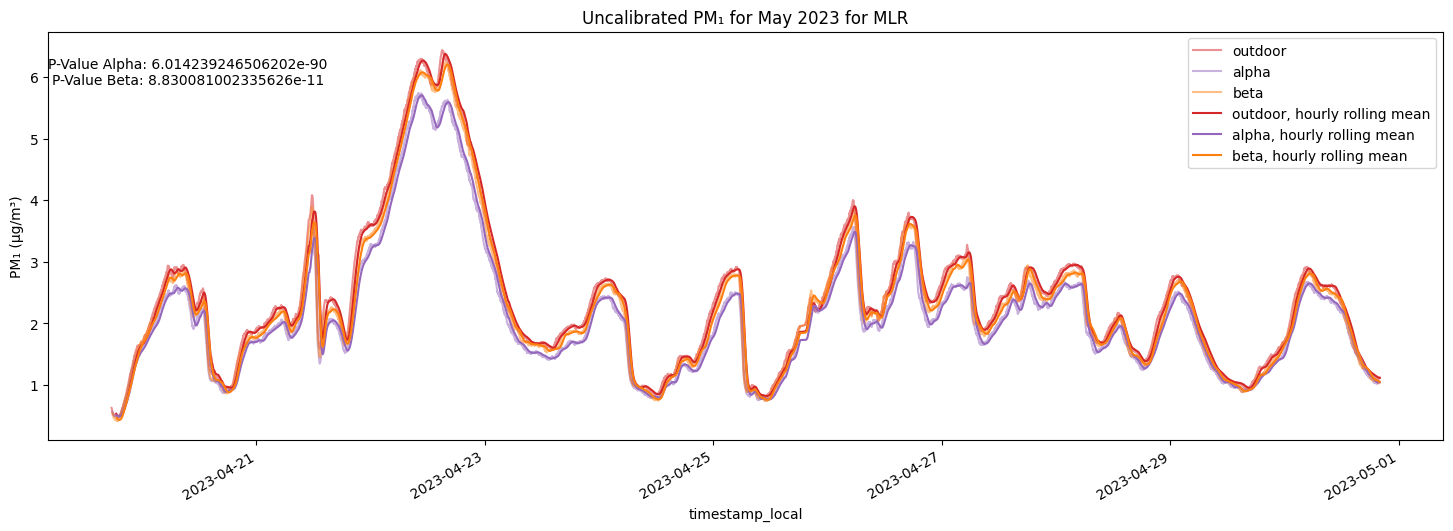

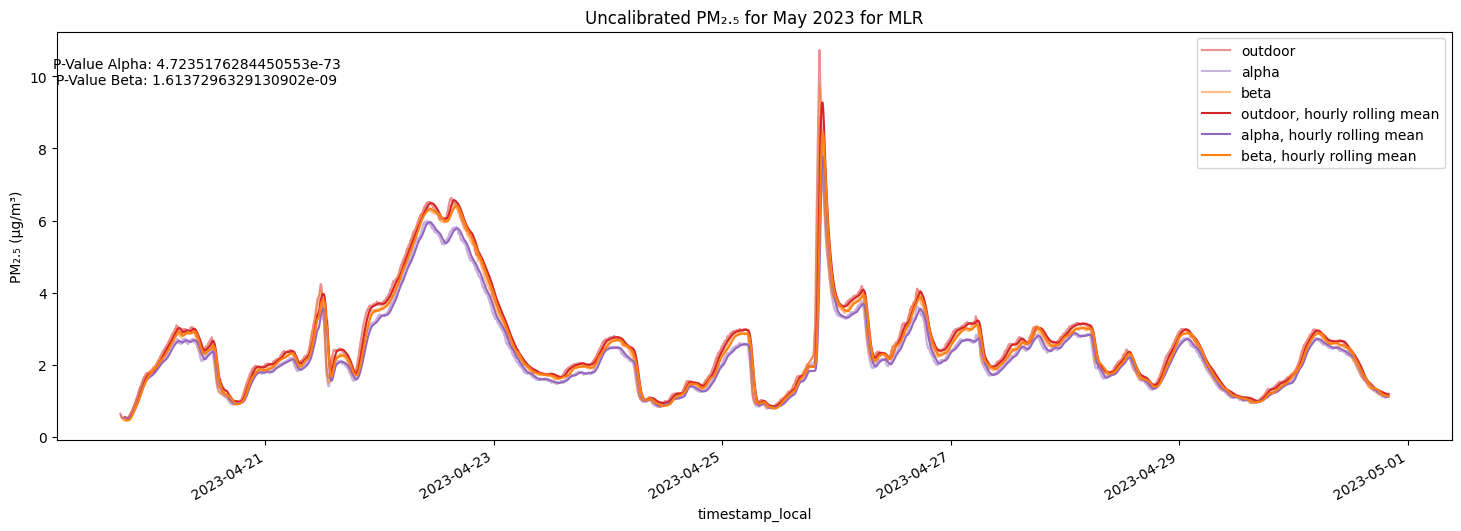

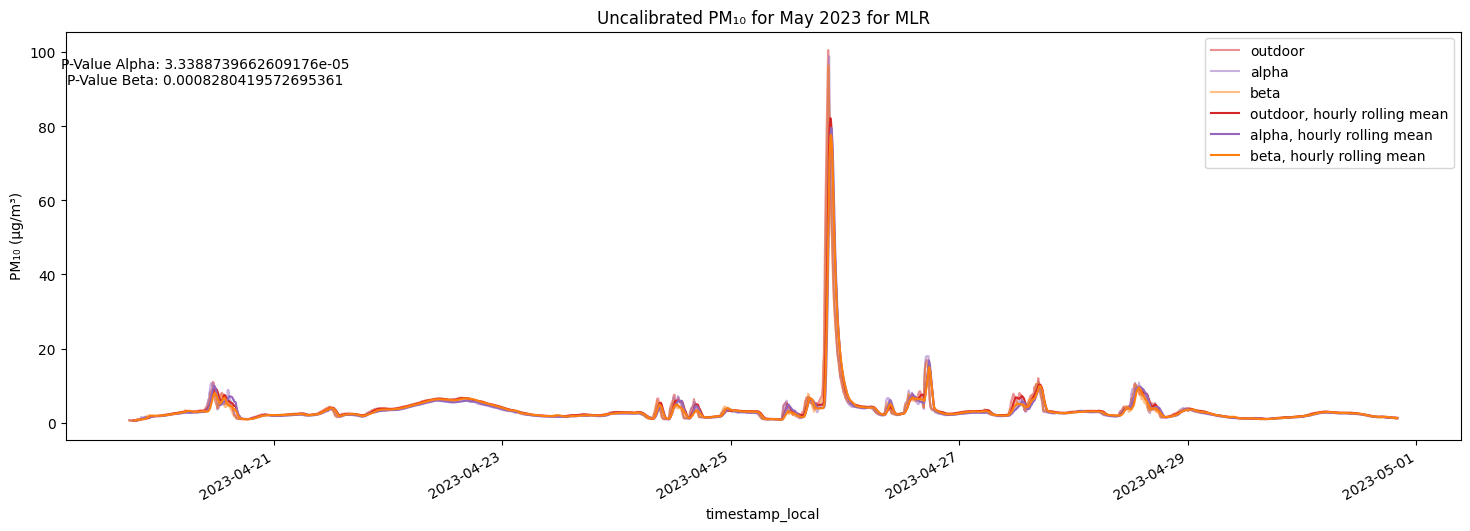

In [99]:
for parameter in parameters[1:4]:
    test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
    test_dfAlp[f'60 mean new {parameter["name"]}']=test_dfAlp[parameter['name']].rolling(60).mean()
    test_dfBet[f'60 mean new {parameter["name"]}']=test_dfBet[parameter['name']].rolling(60).mean()

    fig = plt.figure()
    ax = plt.subplot(111)
    plt.gcf().set_size_inches(18, 6)
    plt.title(f'Uncalibrated {parameter["label"]} for May 2023 for MLR' )
    plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
    plt.xlabel('Time (days)')
    
    plt.grid(True)
    _, p_value_alpha = stats.ttest_ind(test_dfMod[parameter["name"]], test_dfAlp[parameter["name"]], equal_var=False)
    _, p_value_beta = stats.ttest_ind(test_dfMod[parameter["name"]], test_dfBet[ parameter["name"]], equal_var=False)

    plt.text(0.1, 0.9, f'P-Value Alpha: {p_value_alpha}\nP-Value Beta: {p_value_beta}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10)

   

    test_dfMod[parameter["name"]].plot(color='tab:red', label='outdoor', alpha=0.5)
    test_dfAlp[parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.5)
    test_dfBet[parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.5)
    test_dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:red', label='outdoor, hourly rolling mean')
    test_dfAlp[f'60 mean new {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
    test_dfBet[f'60 mean new {parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
    plt.legend()


    print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
    print(f"{parameter['label']} P-Value Beta:", p_value_beta)


In [93]:


for parameter in parameters[1:4]:
    test_dfAlp["new "+ parameter["name"]] = alpha_coefficients[parameter["name"]][0]*test_dfAlp[parameter["name"]] + alpha_coefficients[parameter["name"]][1]*test_dfAlp['temp'] + alpha_coefficients[parameter["name"]][2]*test_dfAlp['log_rh'] + alpha_intercept[parameter["name"]]
    test_dfBet["new "+ parameter["name"]] = beta_coefficients[parameter["name"]][0]*test_dfBet[parameter["name"]] + beta_coefficients[parameter["name"]][1]*test_dfBet['temp'] + beta_coefficients[parameter["name"]][2]*test_dfBet['log_rh'] + beta_intercept[parameter["name"]]


/tmp/ipykernel_25589/1070587326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp["new "+ parameter["name"]] = alpha_coefficients[parameter["name"]][0]*test_dfAlp[parameter["name"]] + alpha_coefficients[parameter["name"]][1]*test_dfAlp['temp'] + alpha_coefficients[parameter["name"]][2]*test_dfAlp['log_rh'] + alpha_intercept[parameter["name"]]
/tmp/ipykernel_25589/1070587326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfBet["new "+ parameter["name"]] = beta_coefficients[parameter["n

/tmp/ipykernel_25589/1140541400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/1140541400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean new {parameter["name"]}']=test_dfAlp["new " + parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/1140541400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

PM₁ P-Value Alpha: 3.323860947000151e-11
PM₁ P-Value Beta: 0.6440152487430872


/tmp/ipykernel_25589/1140541400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/1140541400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean new {parameter["name"]}']=test_dfAlp["new " + parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/1140541400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

PM₂.₅ P-Value Alpha: 3.5819821810483874e-11
PM₂.₅ P-Value Beta: 0.3937957768659083


/tmp/ipykernel_25589/1140541400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/1140541400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfAlp[f'60 mean new {parameter["name"]}']=test_dfAlp["new " + parameter['name']].rolling(60).mean()
/tmp/ipykernel_25589/1140541400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

PM₁₀ P-Value Alpha: 0.010709240411247536
PM₁₀ P-Value Beta: 0.31947026367207587


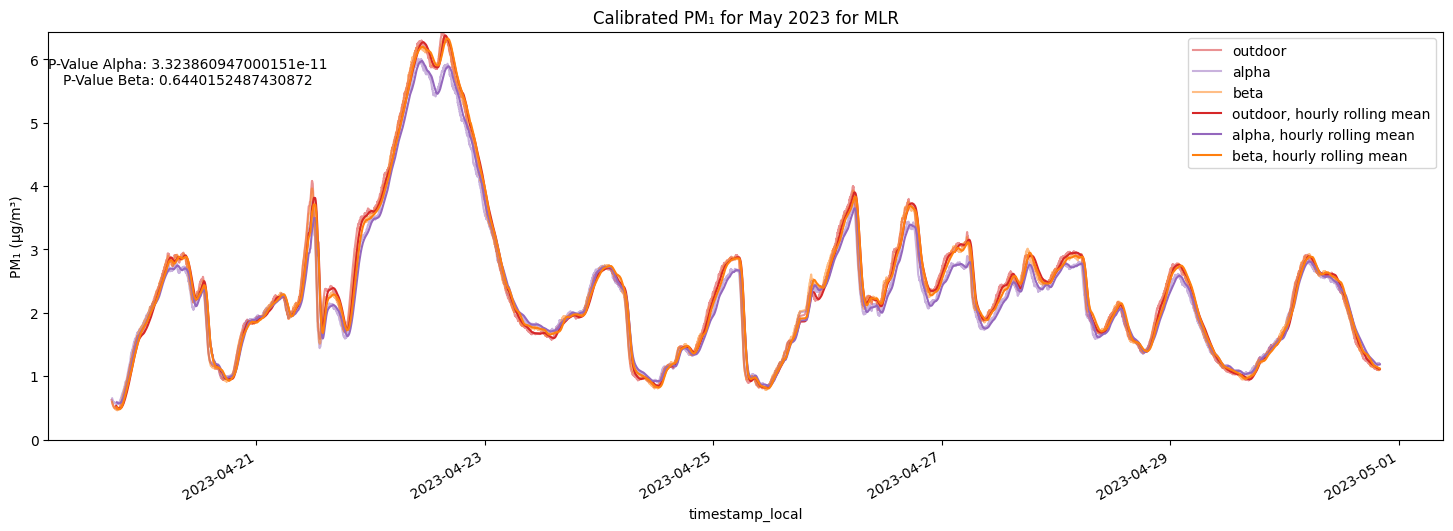

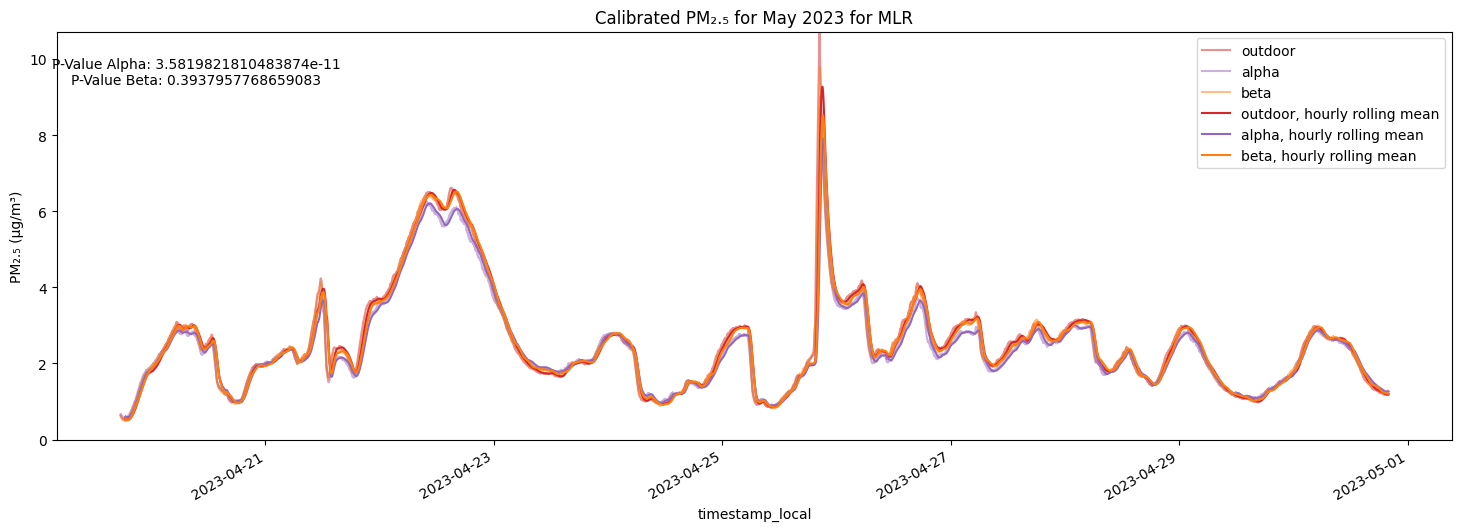

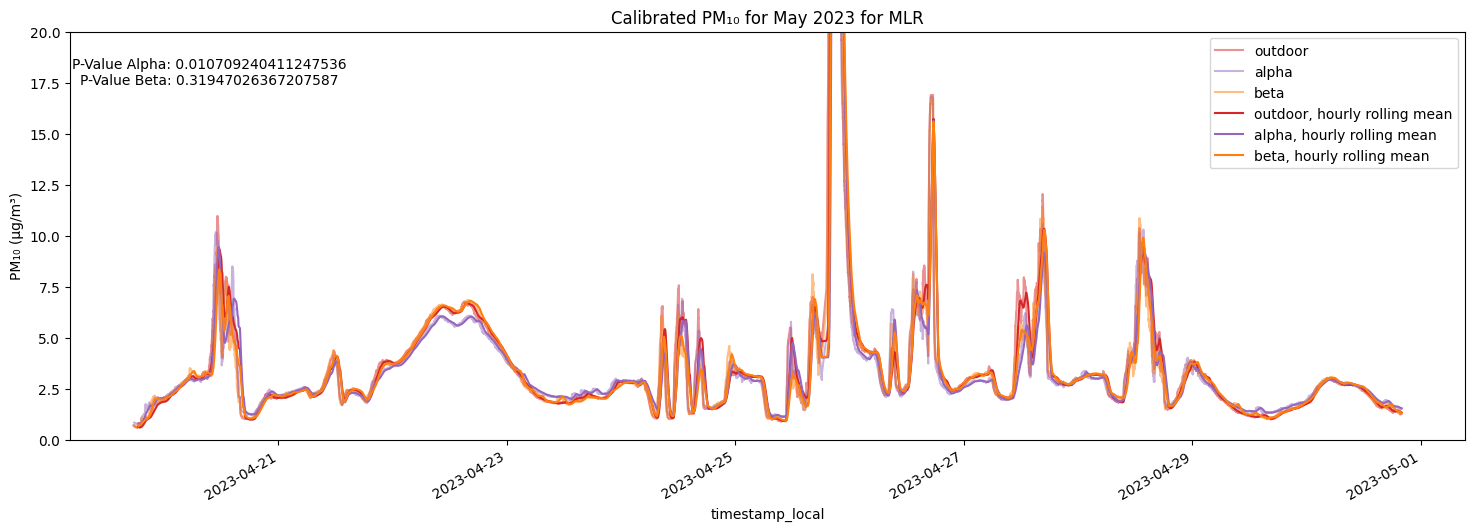

In [94]:
for parameter in parameters[1:4]:
    test_dfMod[f'60 mean {parameter["name"]}']=test_dfMod[parameter['name']].rolling(60).mean()
    test_dfAlp[f'60 mean new {parameter["name"]}']=test_dfAlp["new " + parameter['name']].rolling(60).mean()
    test_dfBet[f'60 mean new {parameter["name"]}']=test_dfBet["new " +parameter['name']].rolling(60).mean()

    fig = plt.figure()
    ax = plt.subplot(111)
    plt.gcf().set_size_inches(18, 6)
    plt.title(f'Calibrated {parameter["label"]} for May 2023 for MLR' )
    plt.ylabel(f'{parameter["label"]} ({parameter["unit"]})')
    plt.xlabel('Time (days)')
    
    plt.grid(True)
    _, p_value_alpha = stats.ttest_ind(test_dfMod[parameter["name"]], test_dfAlp["new " + parameter["name"]], equal_var=False)
    _, p_value_beta = stats.ttest_ind(test_dfMod[parameter["name"]], test_dfBet["new " + parameter["name"]], equal_var=False)

    plt.text(0.1, 0.9, f'P-Value Alpha: {p_value_alpha}\nP-Value Beta: {p_value_beta}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10)

    if max(test_dfMod[parameter["name"]]) > 20:
        plt.ylim(0, 20)

    else:
        plt.ylim(0, max(test_dfMod[parameter["name"]]))

    test_dfMod[parameter["name"]].plot(color='tab:red', label='outdoor', alpha=0.5)
    test_dfAlp["new " + parameter["name"]].plot(color='tab:purple', label='alpha', alpha=0.5)
    test_dfBet["new " + parameter["name"]].plot(color='tab:orange', label='beta', alpha=0.5)
    test_dfMod[f'60 mean {parameter["name"]}'].plot(color='tab:red', label='outdoor, hourly rolling mean')
    test_dfAlp[f'60 mean new {parameter["name"]}'].plot(color='tab:purple', label='alpha, hourly rolling mean')
    test_dfBet[f'60 mean new {parameter["name"]}'].plot(color='tab:orange', label='beta, hourly rolling mean')
    plt.legend()


    print(f"{parameter['label']} P-Value Alpha:", p_value_alpha)
    print(f"{parameter['label']} P-Value Beta:", p_value_beta)


1.0242443999929185
1.0042935249465965
1.022435941490259
1.0045833620571003
1.0625633741107117
1.0146988546152047


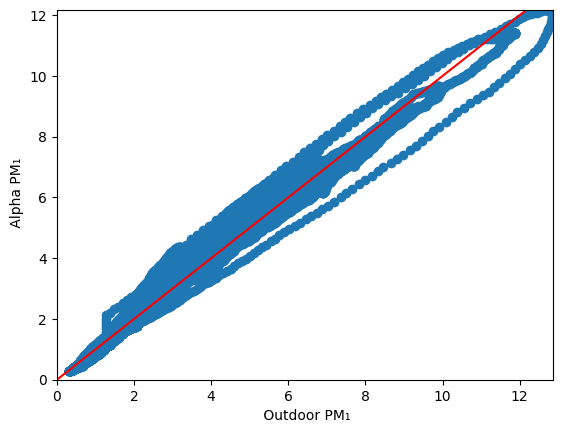

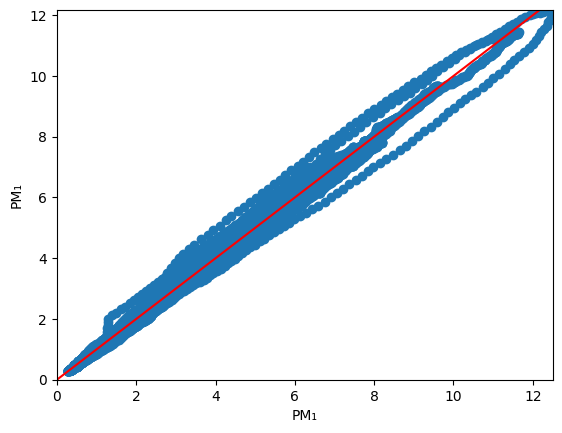

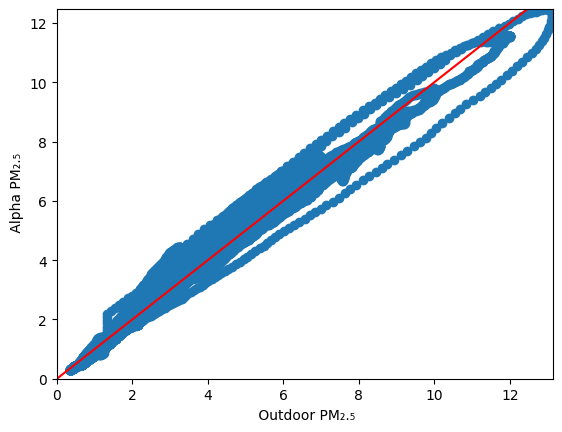

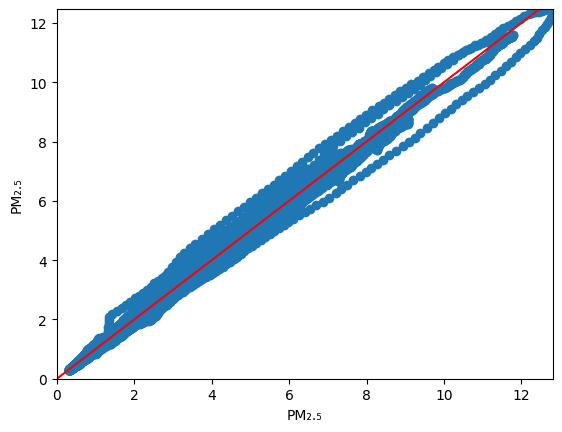

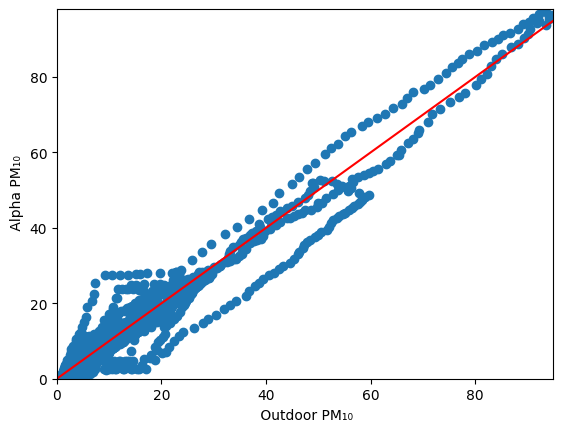

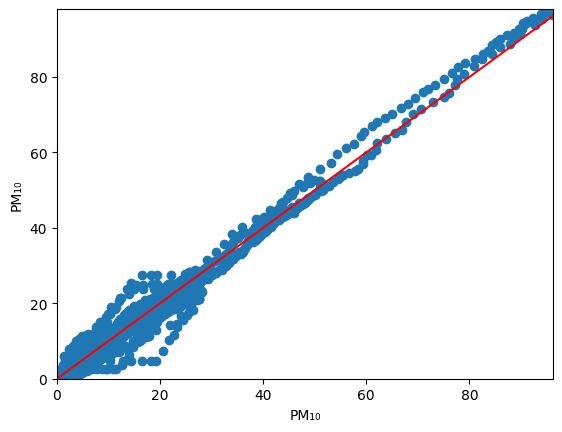

In [95]:

x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)

for parameter in parameters[1:4]:
    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.plot(train_dfAlp["new " + parameter["name"]],train_dfMod[parameter["name"]][:len(train_dfAlp)], 'o', label='Original data')
    plt.plot(x, y, 'r', label='Fitted line')
    
    plt.ylim(0, max(train_dfMod[parameter["name"]][:len(train_dfAlp)]))
    plt.xlim(0, max(train_dfAlp["new " +parameter["name"]]))
    plt.xlabel(f' Outdoor {parameter["label"]}')
    plt.ylabel(f' Alpha {parameter["label"]}')

    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.plot(train_dfBet["new " +parameter["name"]],train_dfMod[parameter["name"]][:len(train_dfBet)], 'o', label='Original data')
    plt.plot(x, y, 'r', label='Fitted line')

    plt.ylim(0, max(train_dfMod[parameter["name"]][:len(train_dfBet)]))
    plt.xlim(0, max(train_dfBet["new " +parameter["name"]]))
    
    
    plt.xlabel(parameter["label"])
    plt.ylabel(parameter["label"])


    
    print(np.mean(train_dfAlp["new " +parameter["name"]][:len(dfAlp)]/dfMod[parameter["name"]][:len(dfAlp)]))
    print(np.mean(train_dfBet["new " +parameter["name"]][:len(dfBet)]/dfMod[parameter["name"]][:len(dfBet)]))
    

0.8982451773211025
0.9612655827342163
0.905520804408067
0.9634538103684516
0.9265560201028112
0.9545842257959554


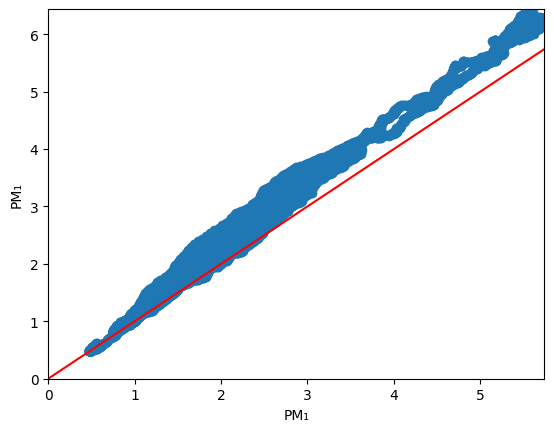

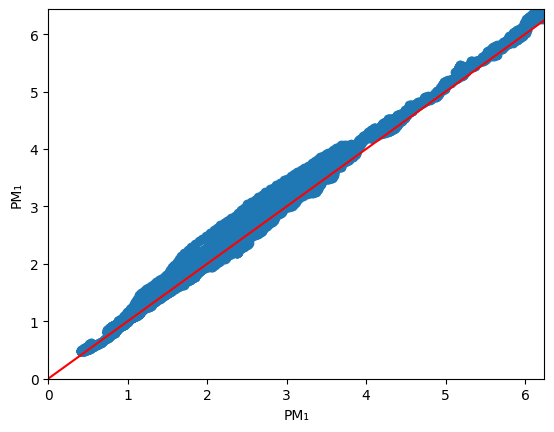

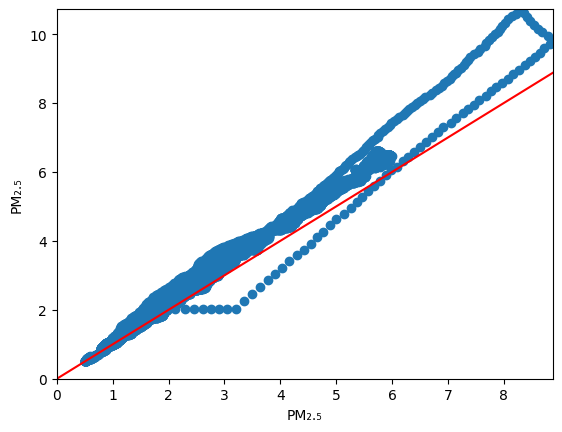

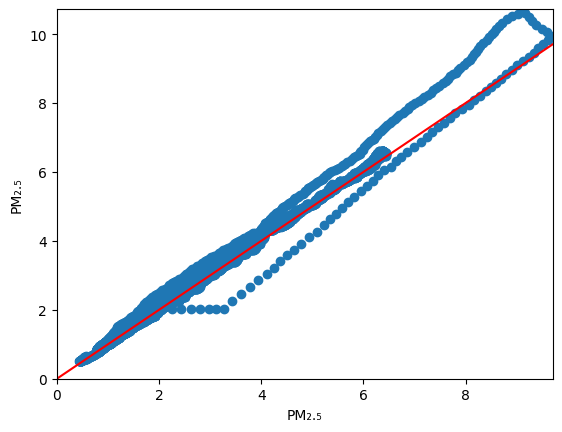

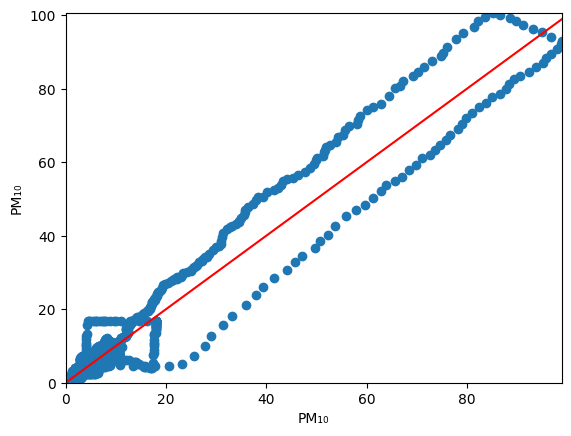

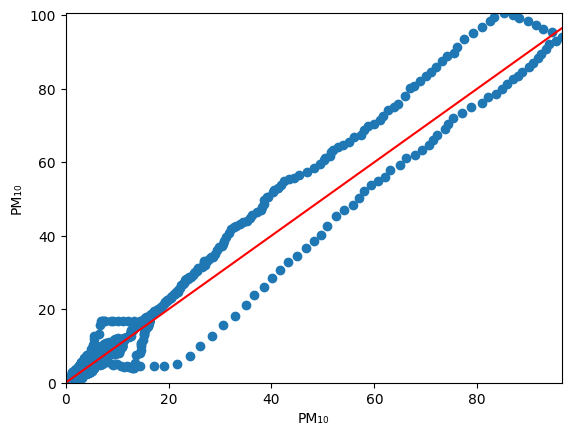

In [96]:

x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)

for parameter in parameters[1:4]:
    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.plot(test_dfAlp[parameter["name"]],test_dfMod[parameter["name"]][:len(test_dfAlp)], 'o', label='Original data')
    plt.plot(x, y, 'r', label='Fitted line')
    
    plt.ylim(0, max(test_dfMod[parameter["name"]][:len(test_dfAlp)]))
    plt.xlim(0, max(test_dfAlp[parameter["name"]]))
    plt.xlabel(parameter["label"])
    plt.ylabel(parameter["label"])

    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.plot(test_dfBet[parameter["name"]],test_dfMod[parameter["name"]][:len(test_dfBet)], 'o', label='Original data')
    plt.plot(x, y, 'r', label='Fitted line')

    plt.ylim(0, max(test_dfMod[parameter["name"]][:len(test_dfBet)]))
    plt.xlim(0, max(test_dfBet[parameter["name"]]))
    
    
    plt.xlabel(parameter["label"])
    plt.ylabel(parameter["label"])


    
    print(np.mean(test_dfAlp[parameter["name"]][:len(dfAlp)]/dfMod[parameter["name"]][:len(dfAlp)]))
    print(np.mean(test_dfBet[parameter["name"]][:len(dfBet)]/dfMod[parameter["name"]][:len(dfBet)]))
    

0.9788161985558023
0.9996365440701998
0.9790911913195861
0.9990280539341602
1.0157301082844161
1.0035584548148244


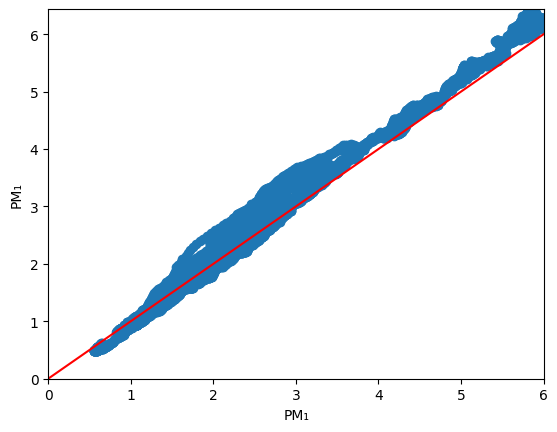

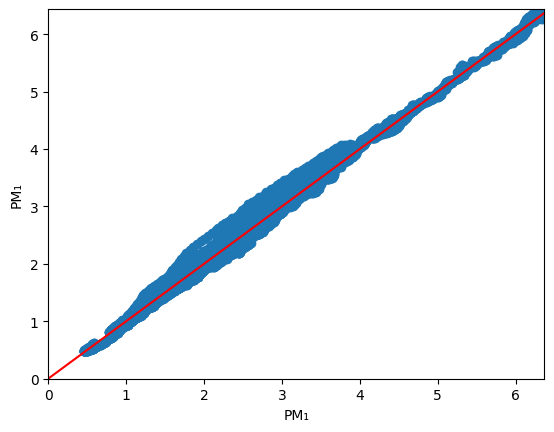

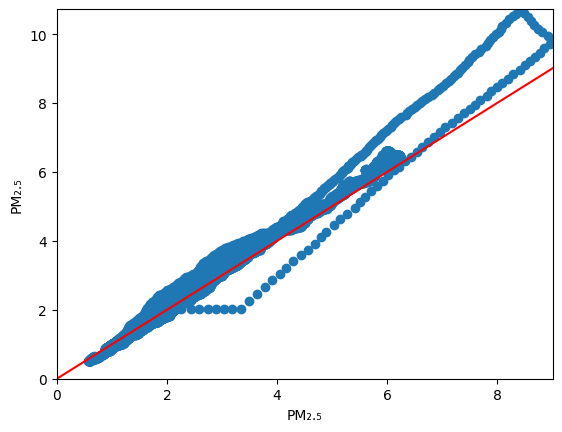

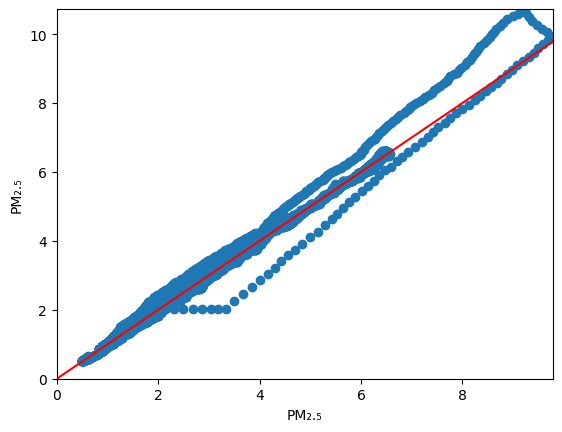

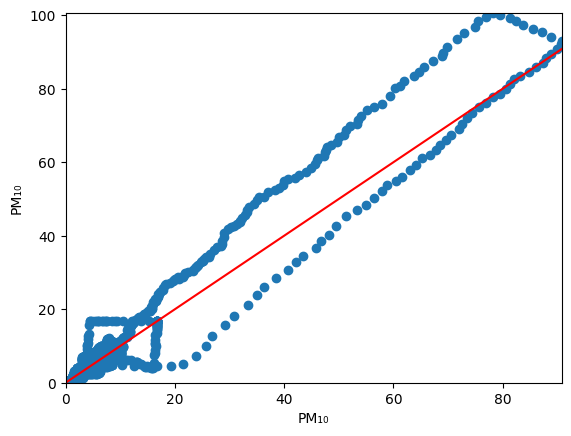

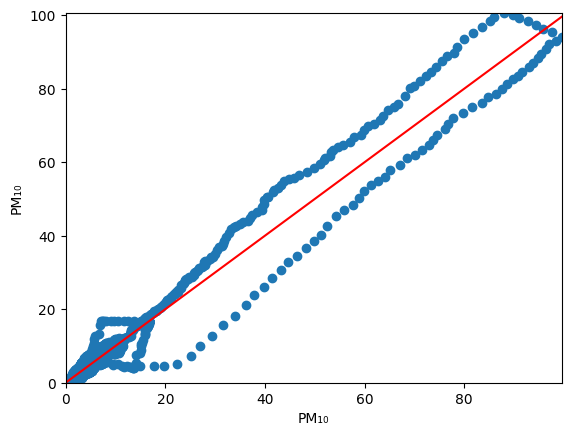

In [97]:


x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)

for parameter in parameters[1:4]:
    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.plot(test_dfAlp["new " + parameter["name"]],test_dfMod[parameter["name"]][:len(test_dfAlp)], 'o', label='Original data')
    plt.plot(x, y, 'r', label='Fitted line')
    
    plt.ylim(0, max(test_dfMod[parameter["name"]][:len(test_dfAlp)]))
    plt.xlim(0, max(test_dfAlp["new " + parameter["name"]]))
    plt.xlabel(parameter["label"])
    plt.ylabel(parameter["label"])

    fig = plt.figure()
    ax = plt.subplot(111)
    
    plt.plot(test_dfBet["new " + parameter["name"]],test_dfMod[parameter["name"]][:len(test_dfBet)], 'o', label='Original data')
    plt.plot(x, y, 'r', label='Fitted line')

    plt.ylim(0, max(test_dfMod[parameter["name"]][:len(test_dfBet)]))
    plt.xlim(0, max(test_dfBet["new " + parameter["name"]]))
    
    
    plt.xlabel(parameter["label"])
    plt.ylabel(parameter["label"])


    
    
    print(np.mean(test_dfAlp["new " +parameter["name"]][:len(dfAlp)]/dfMod[parameter["name"]][:len(dfAlp)]))
    print(np.mean(test_dfBet["new " +parameter["name"]][:len(dfBet)]/dfMod[parameter["name"]][:len(dfBet)]))